In [1]:


import sys 

from IPython import display 
from PIL import Image

sys.path.append("..")
sys.path.append("../utlities")
from utlities.query_and_display import get_emails_from_query




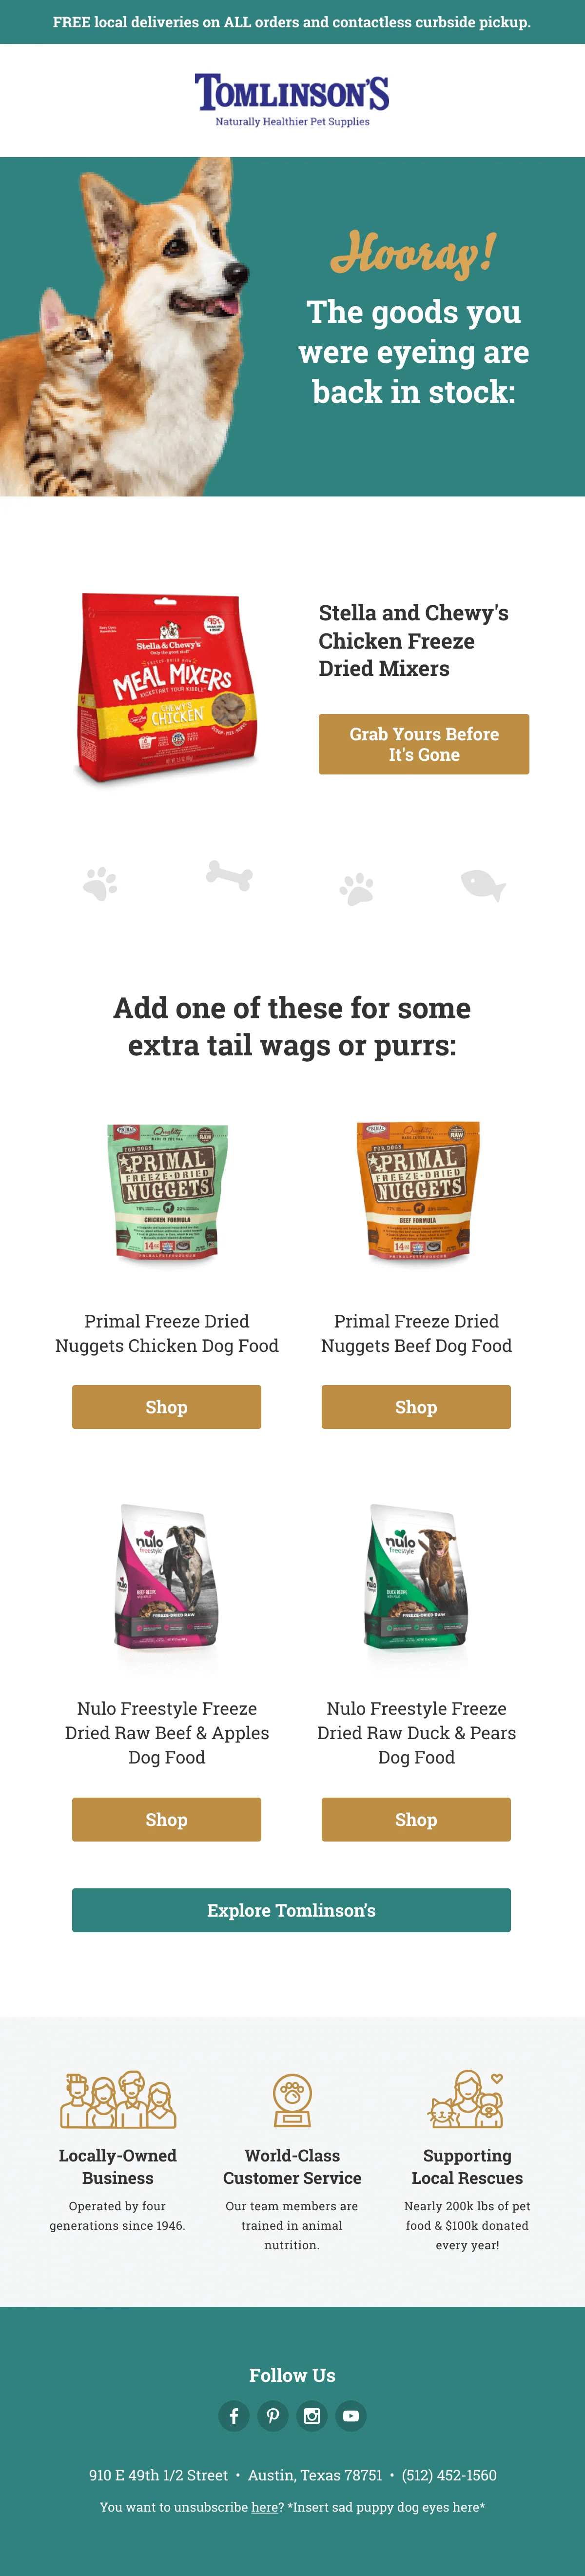
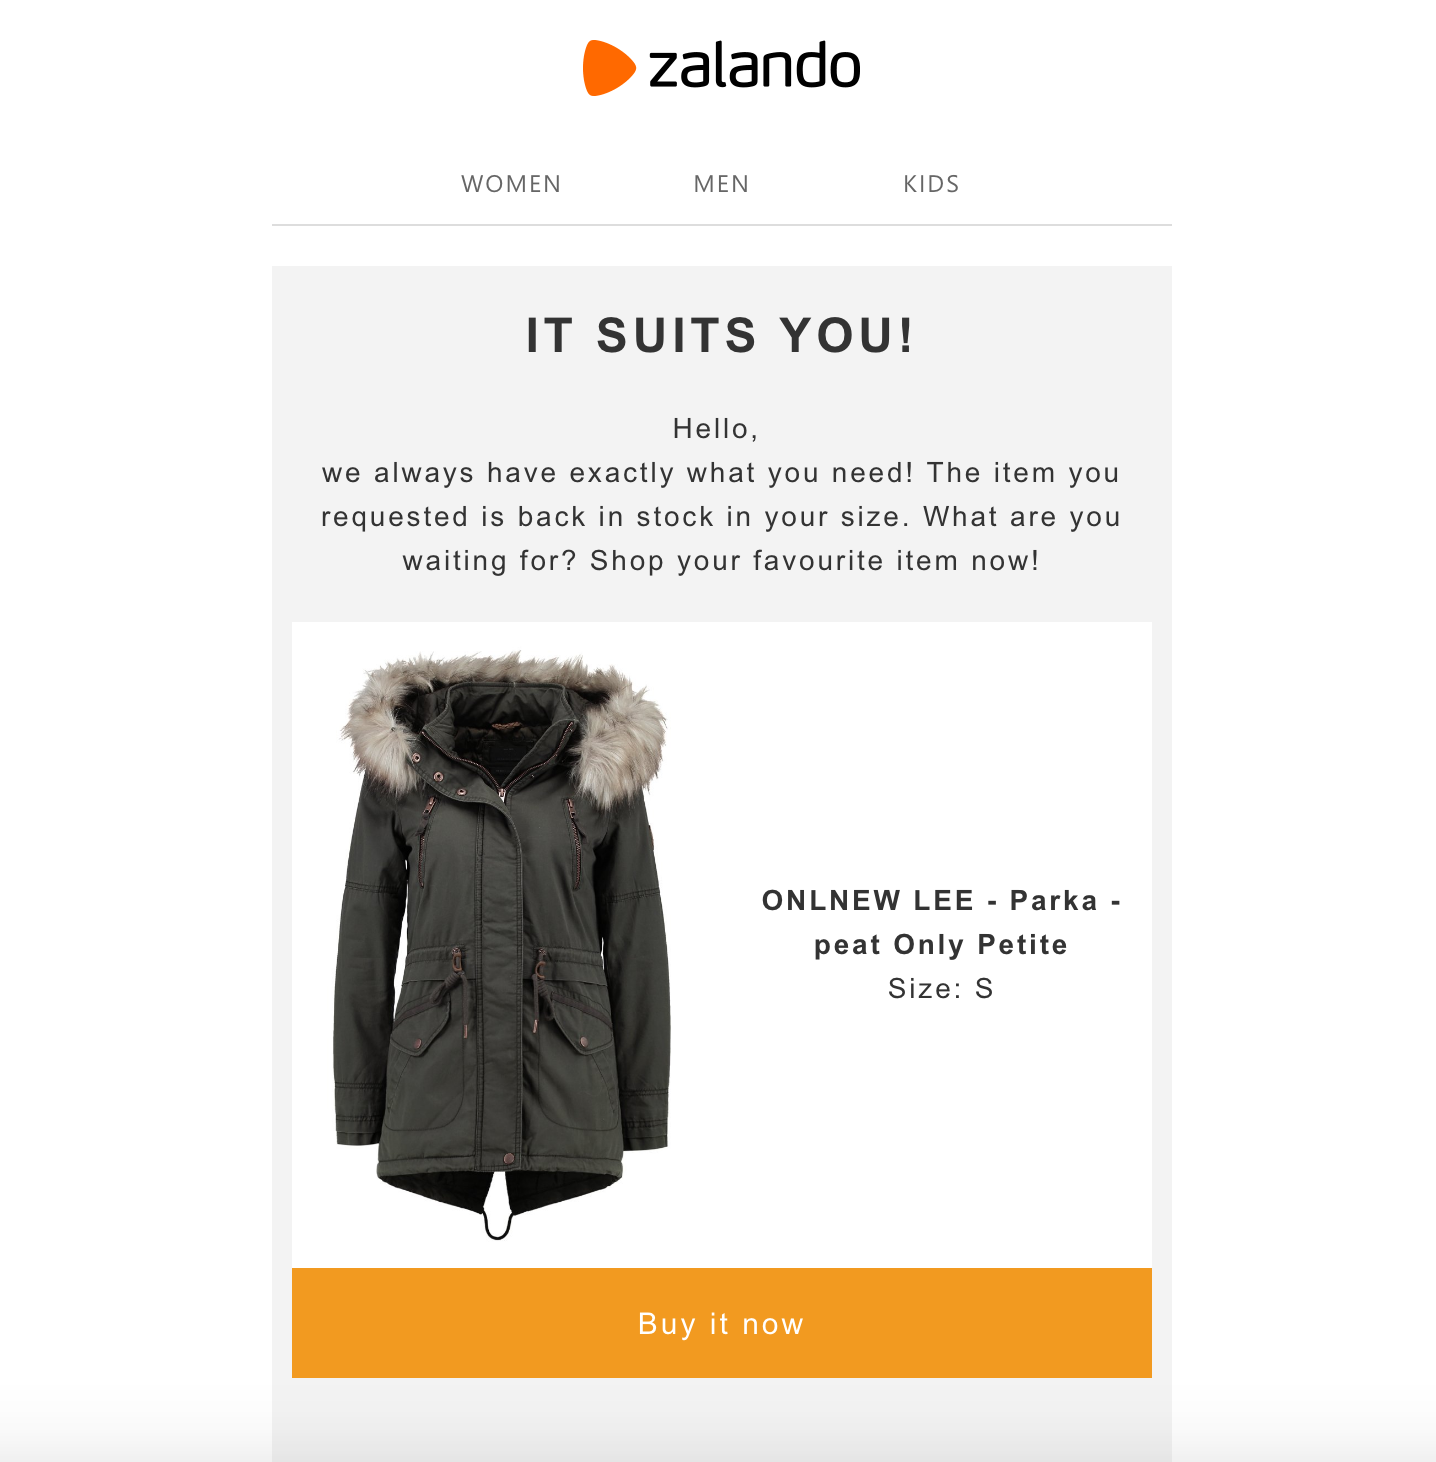
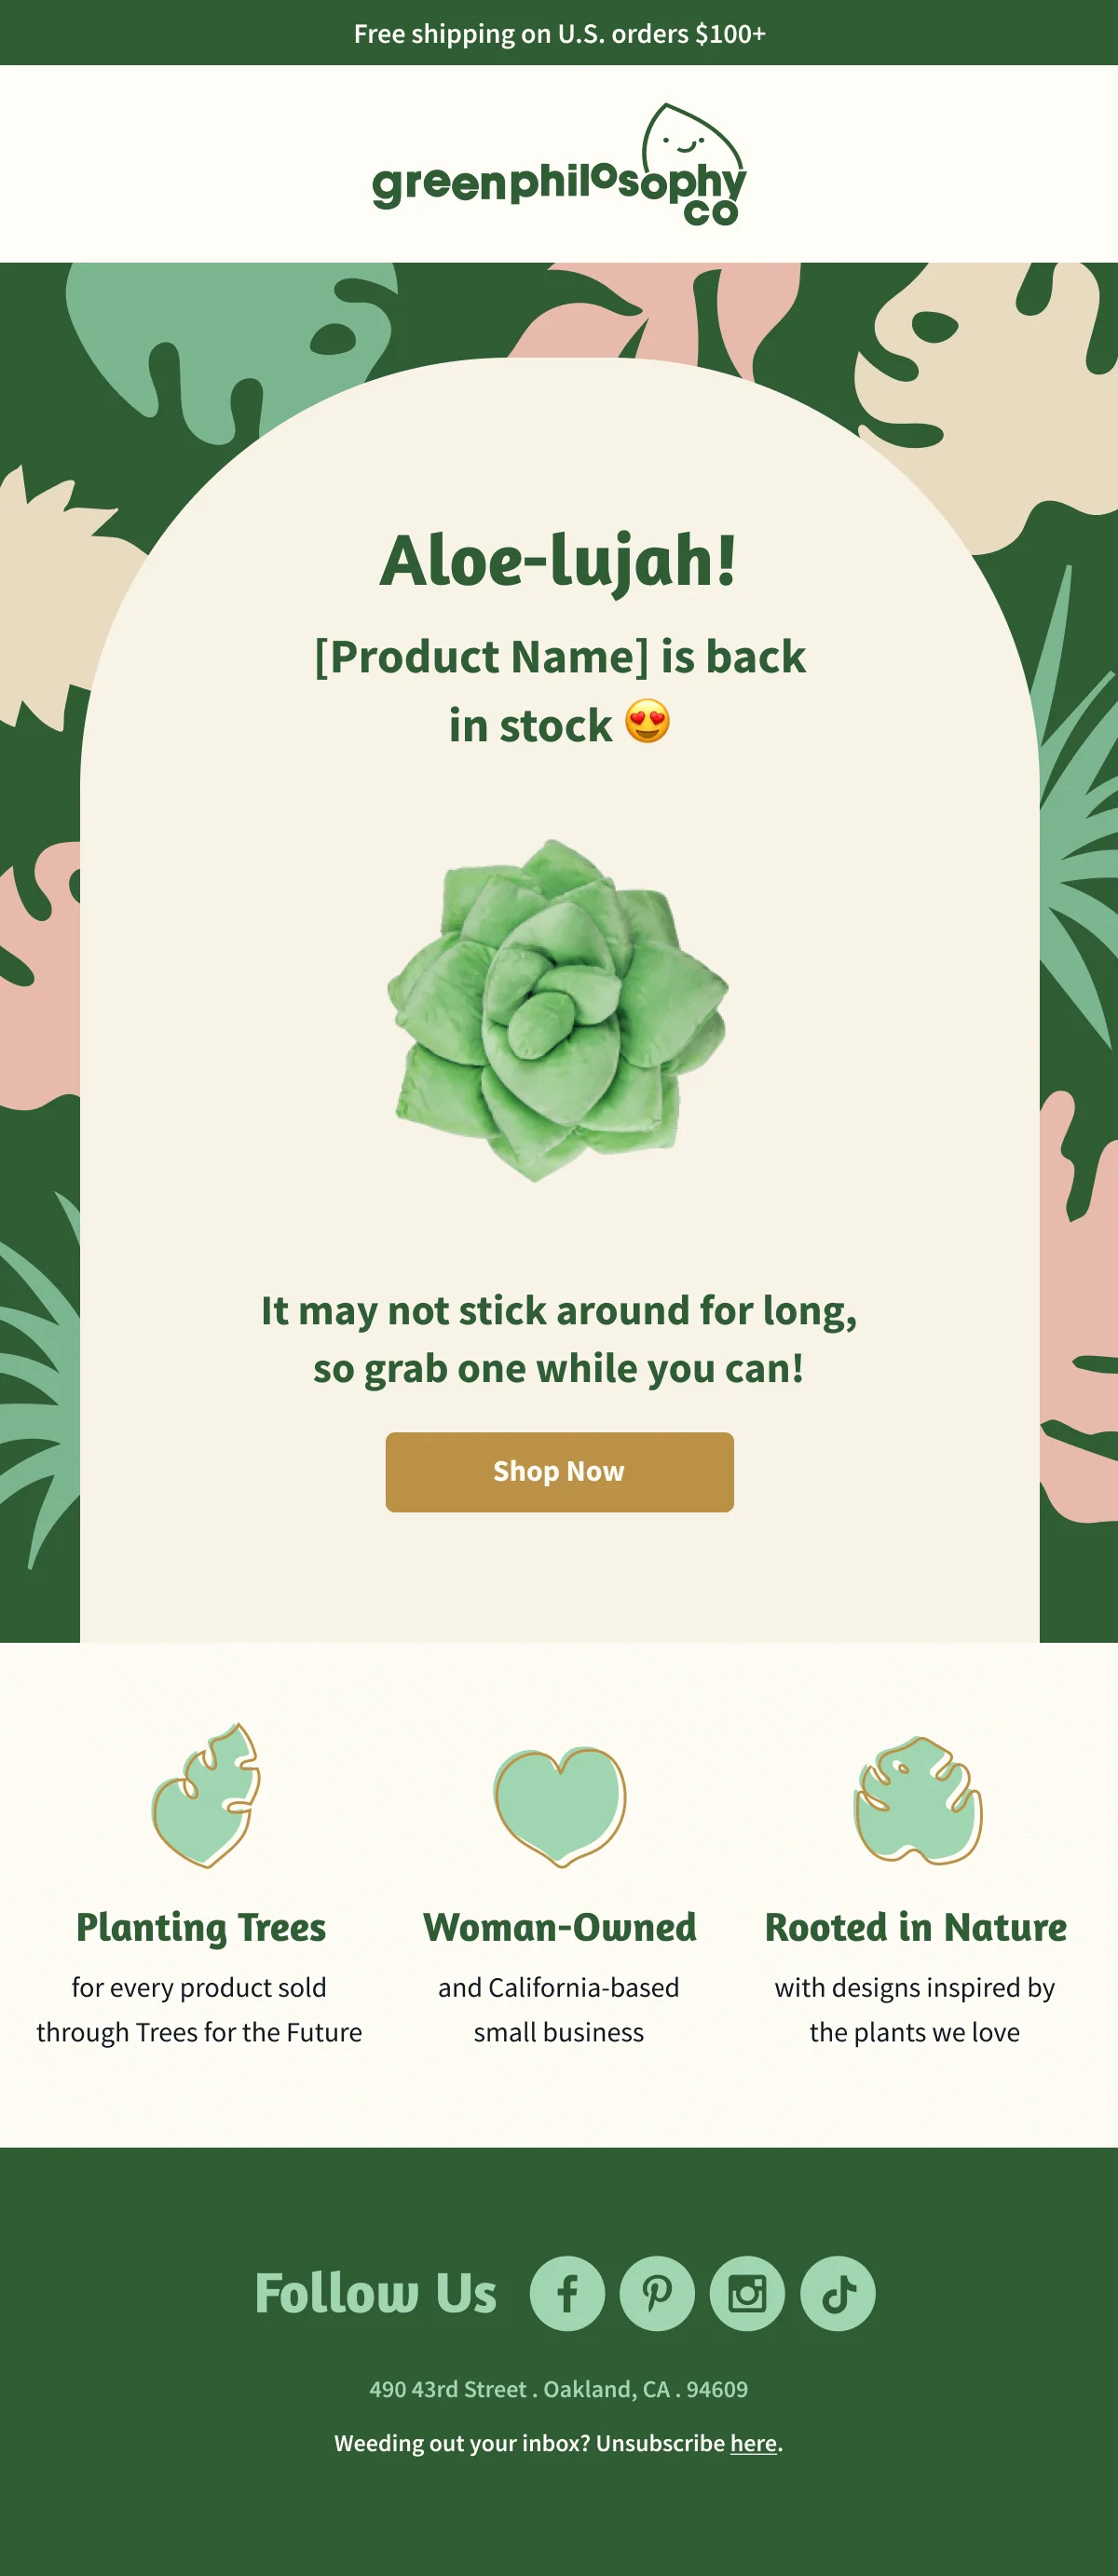
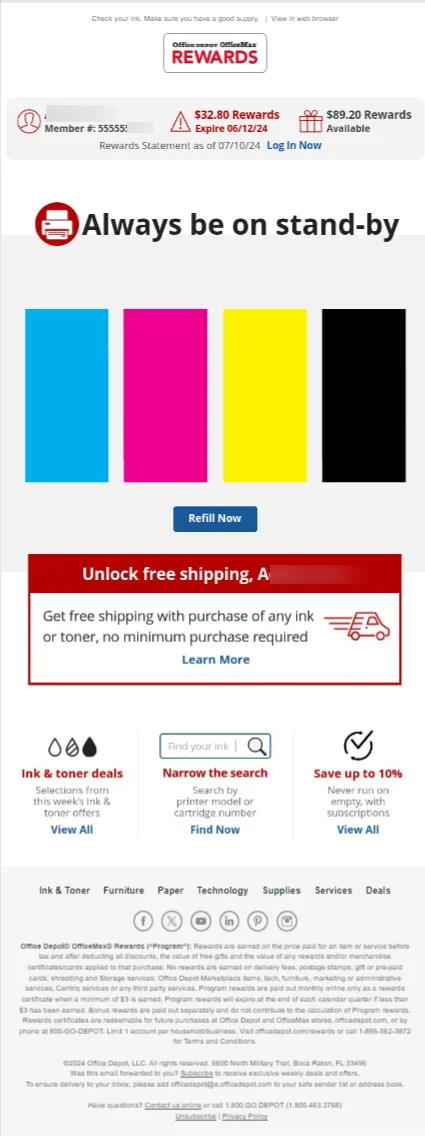
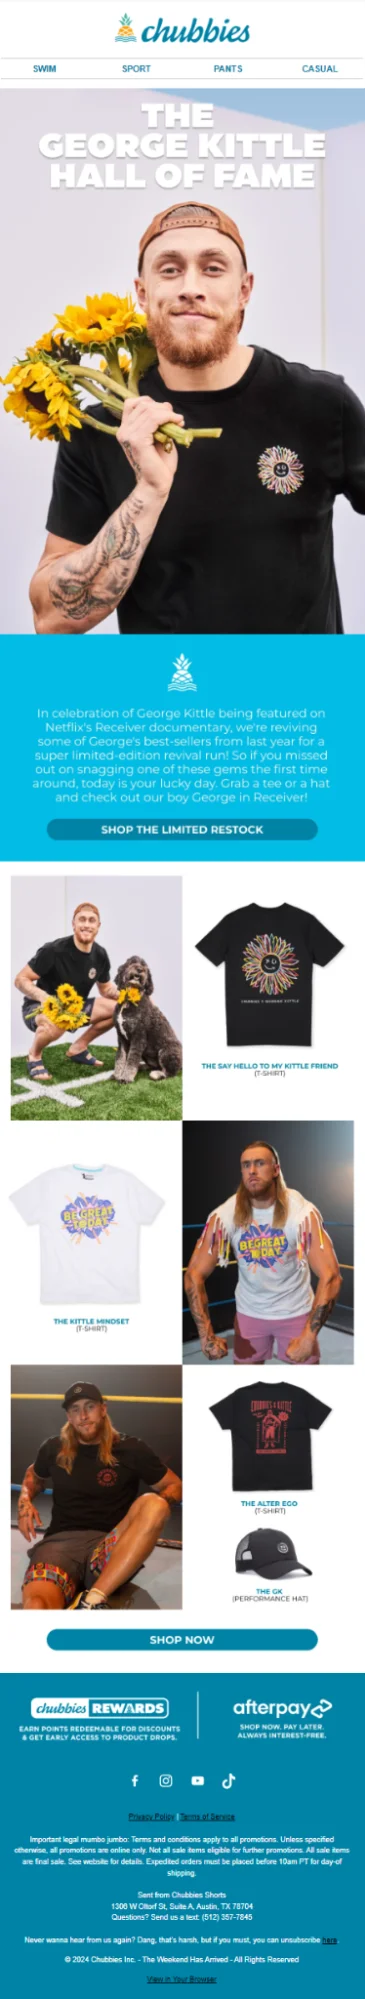
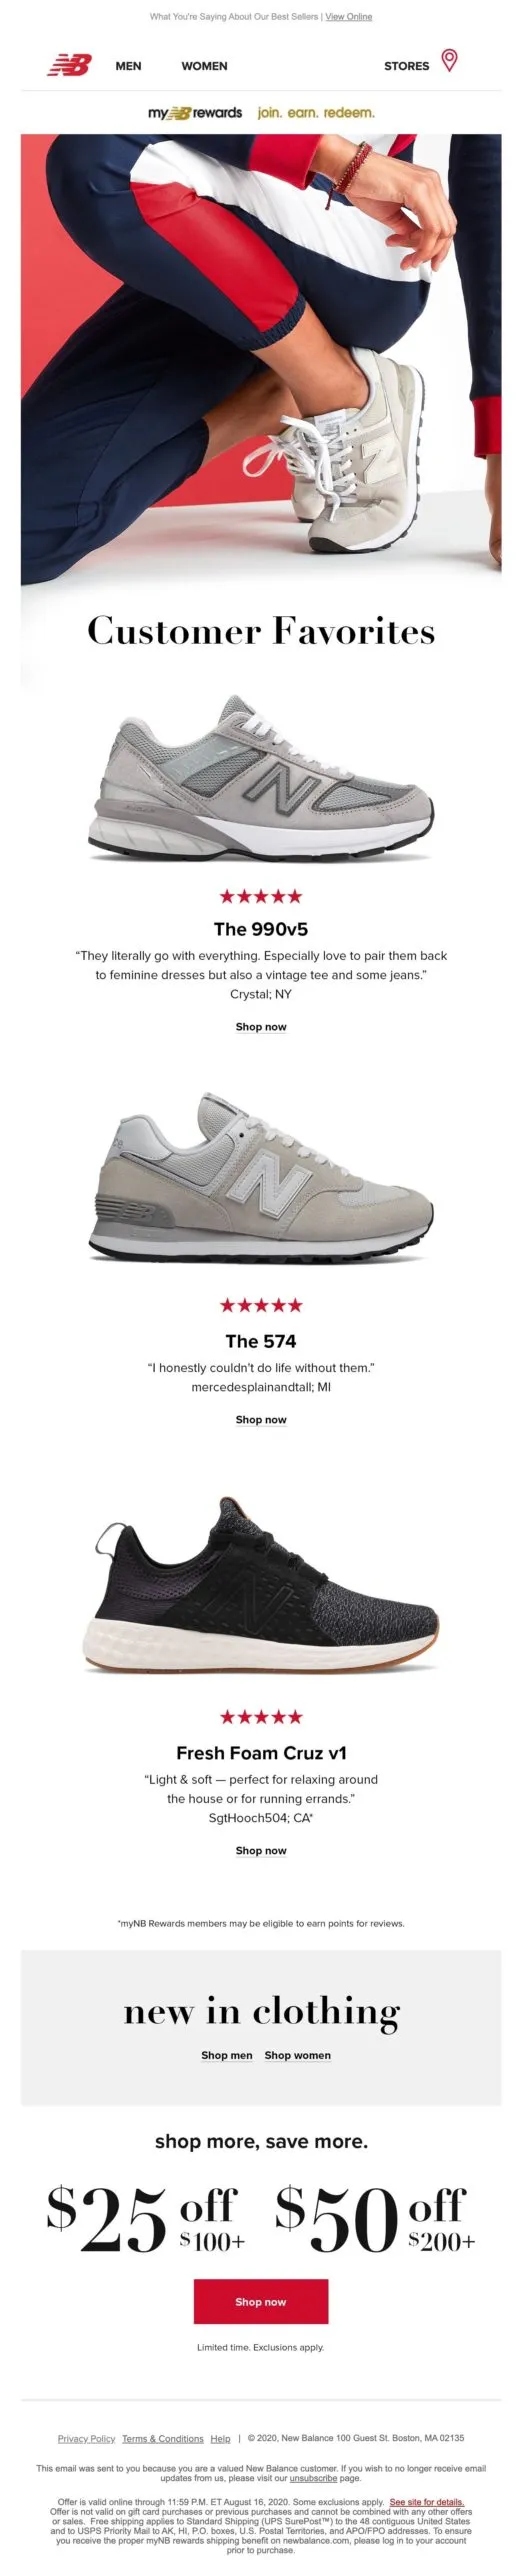
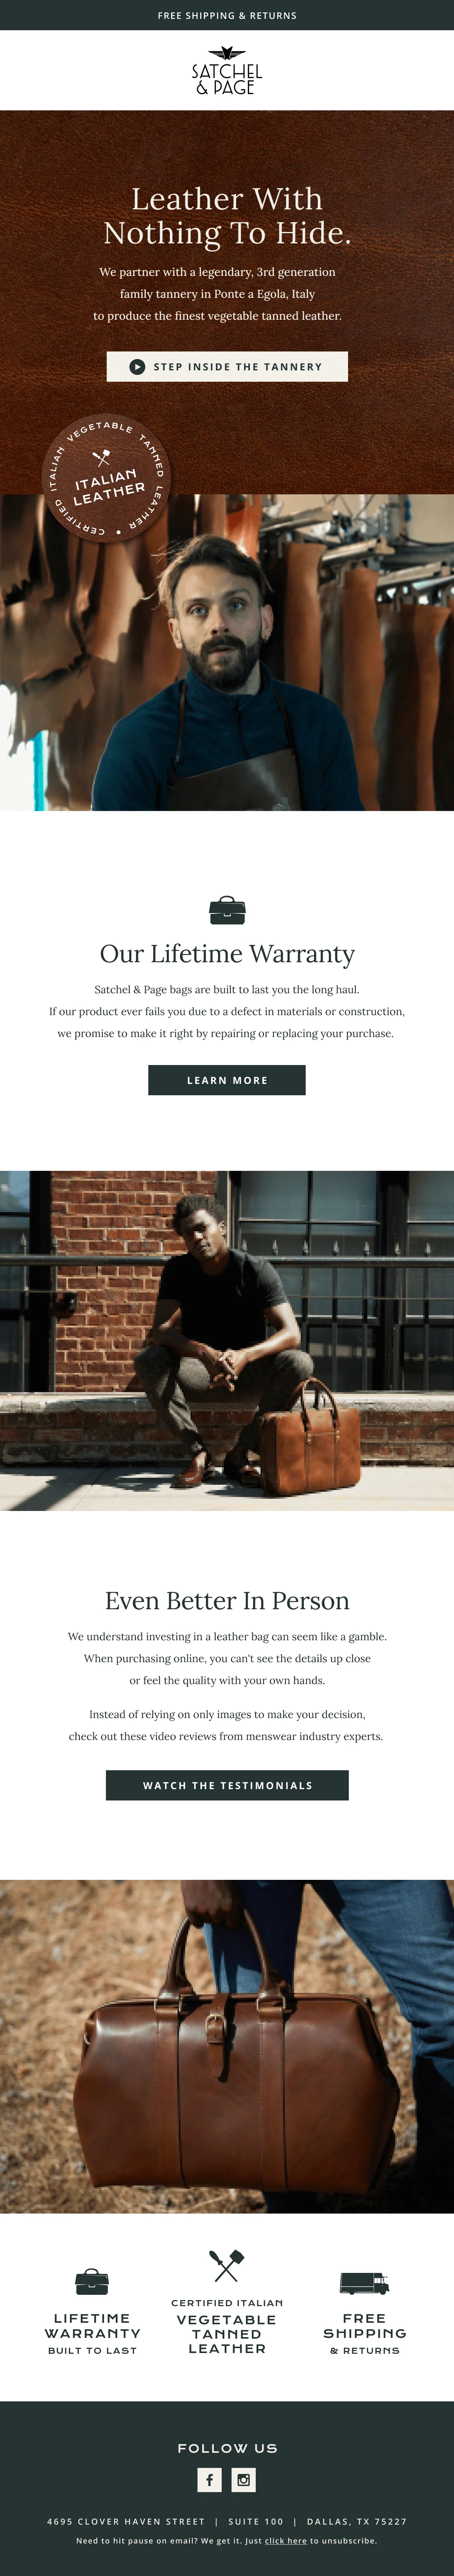
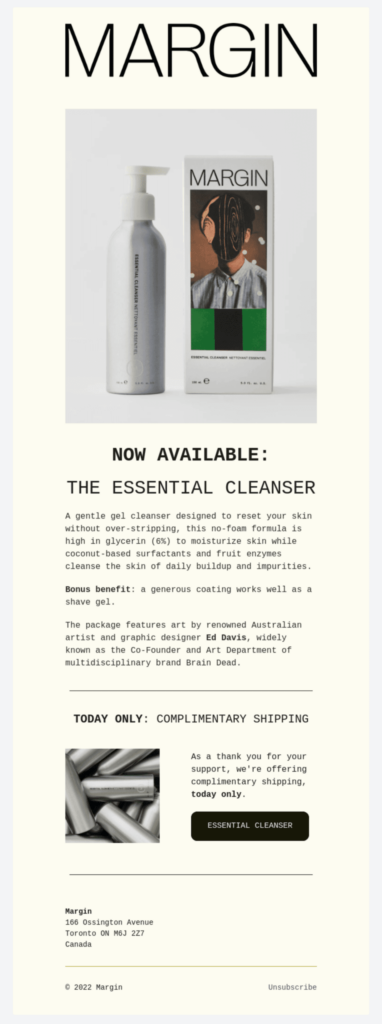
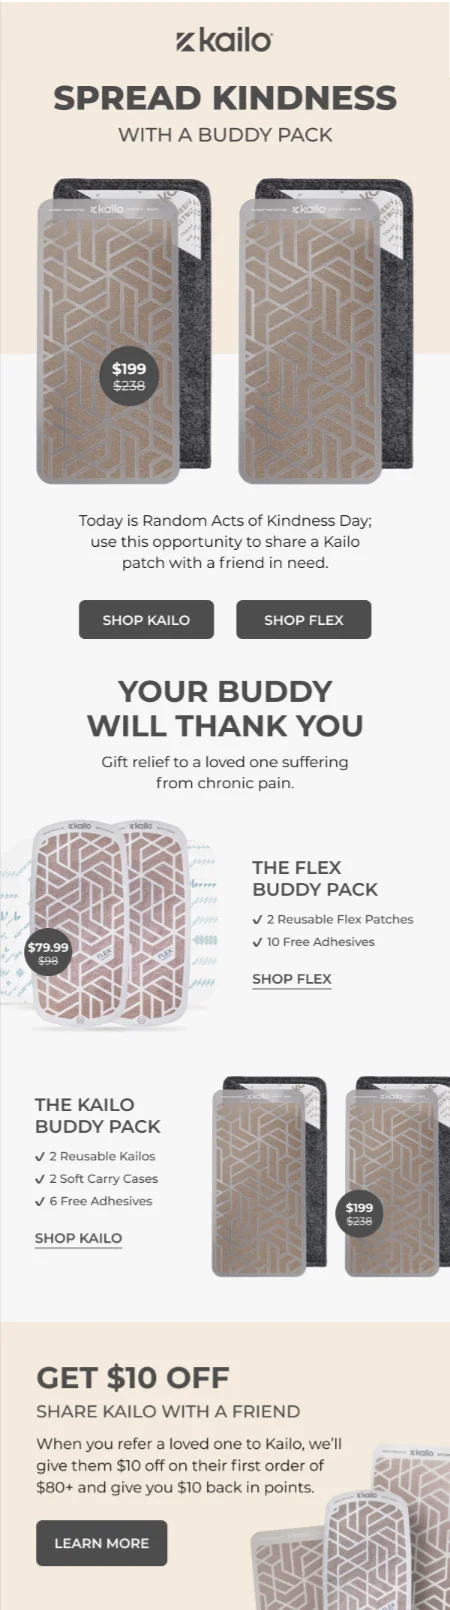

In [2]:

display.display(display.HTML(
    get_emails_from_query("back in stock", index_name="email-type")
))


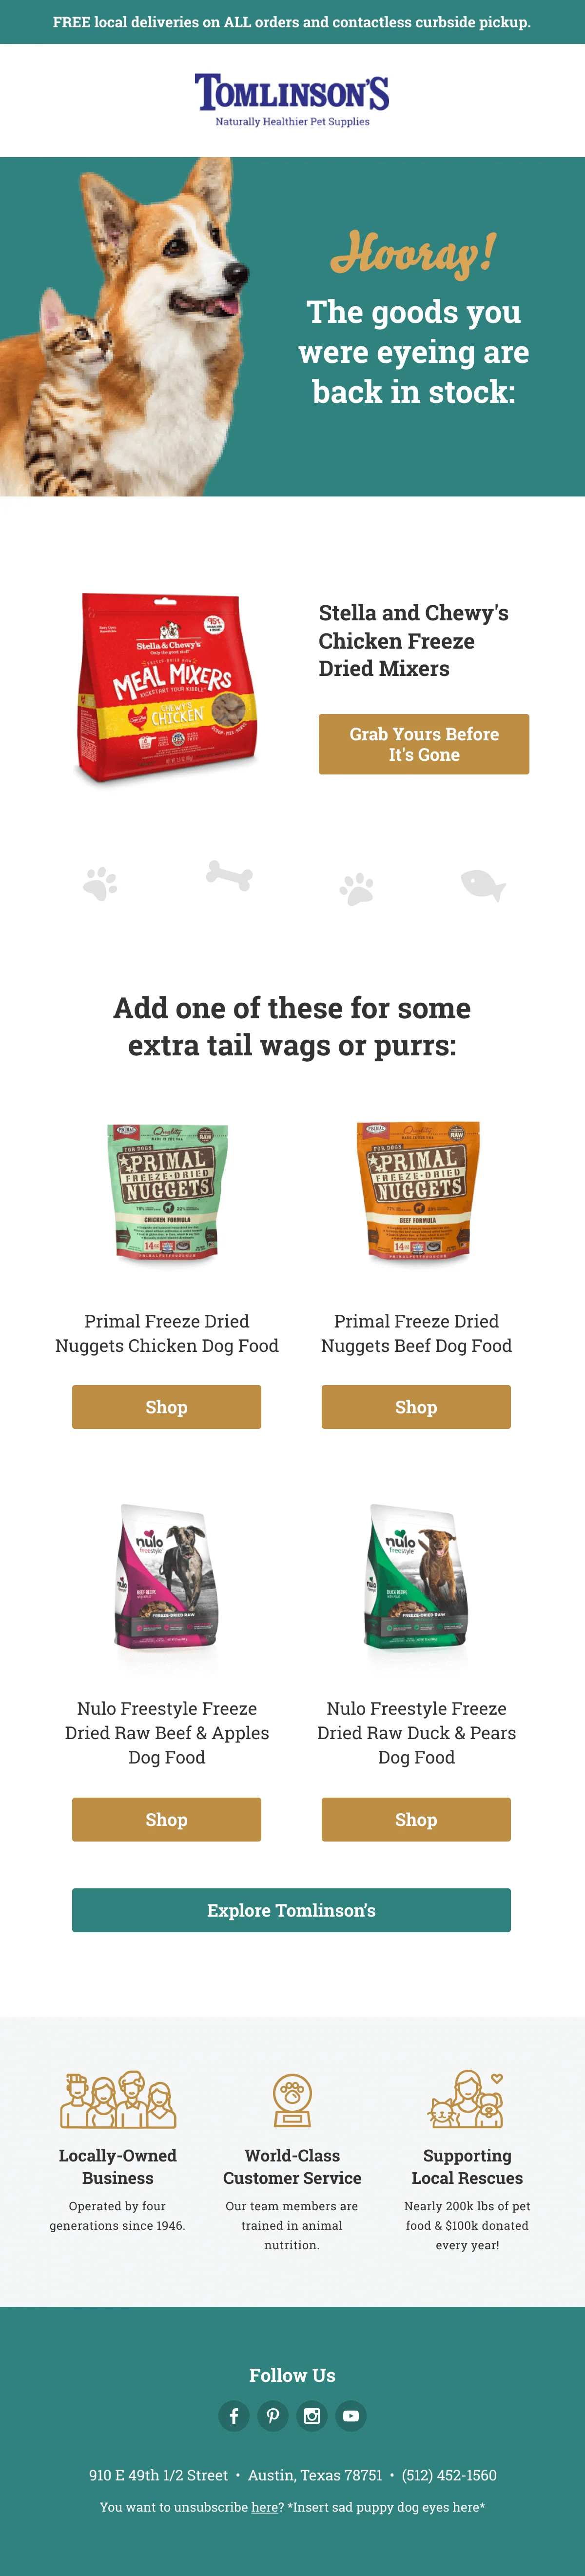
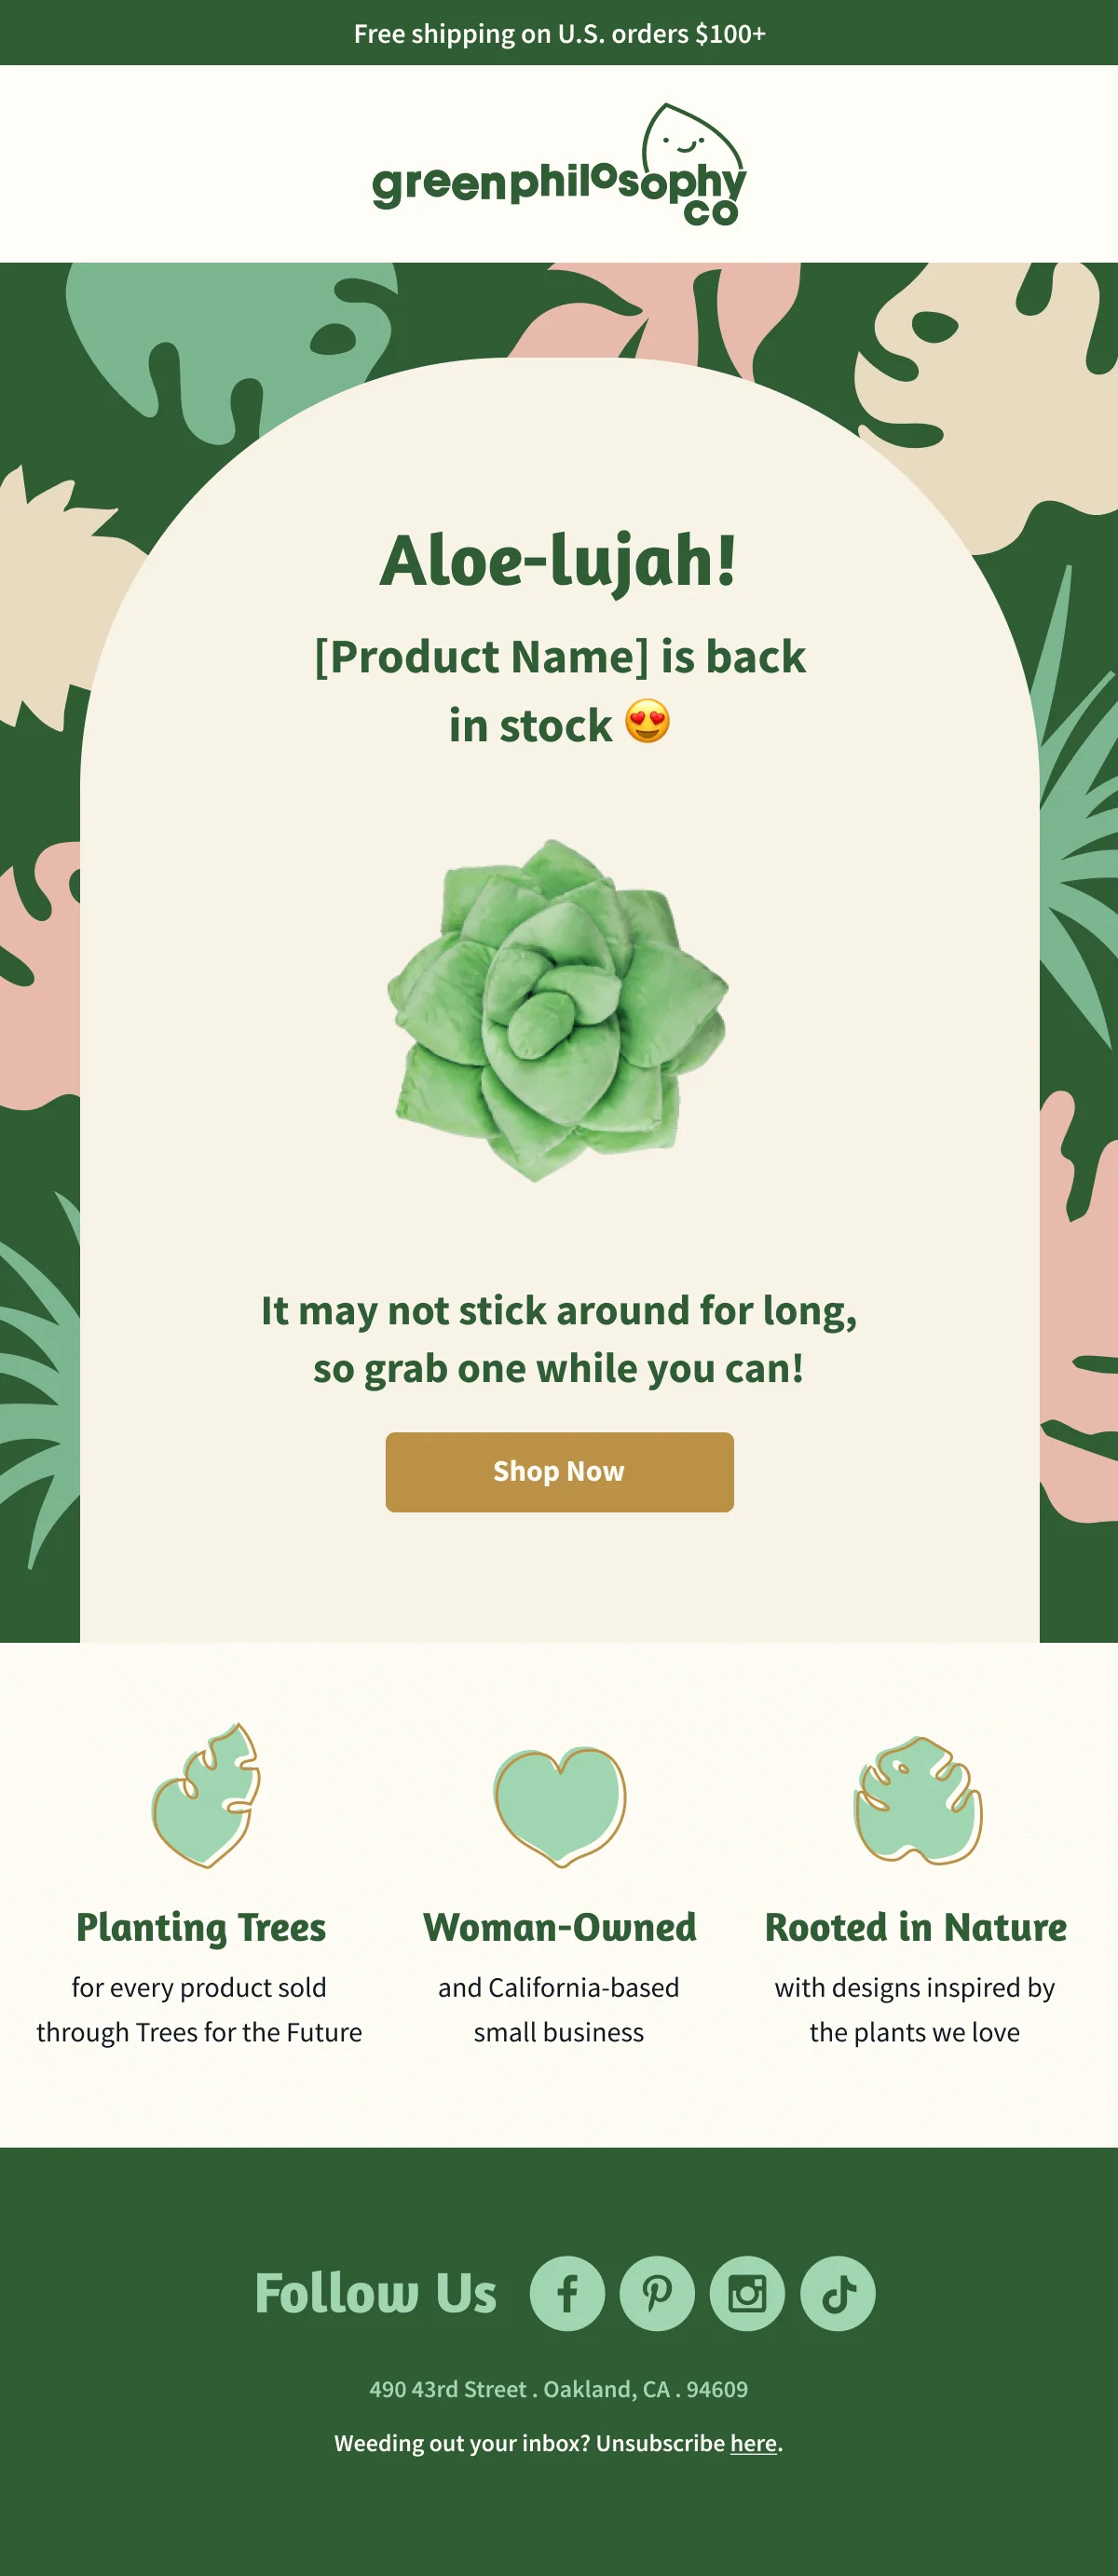
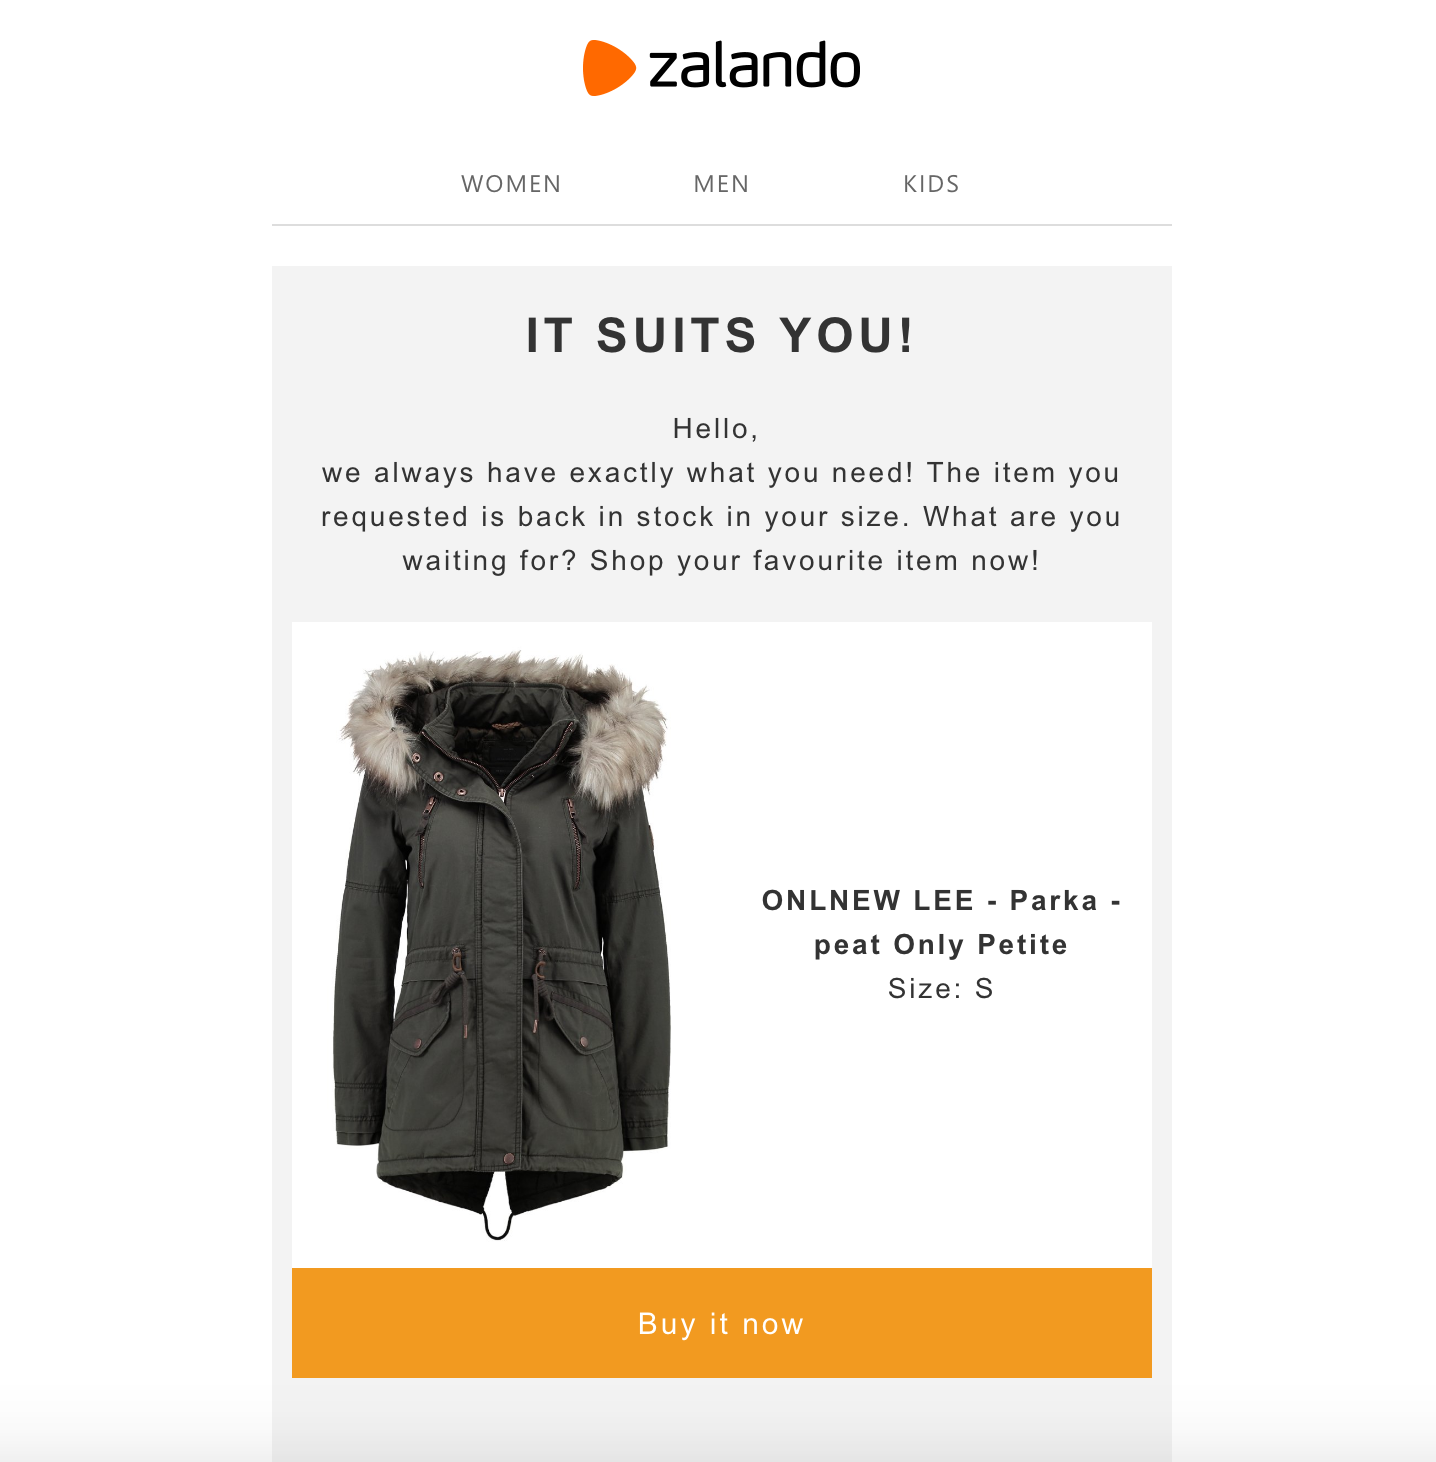
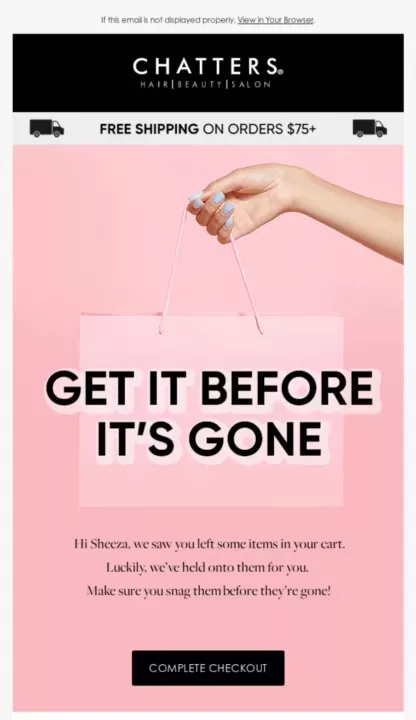
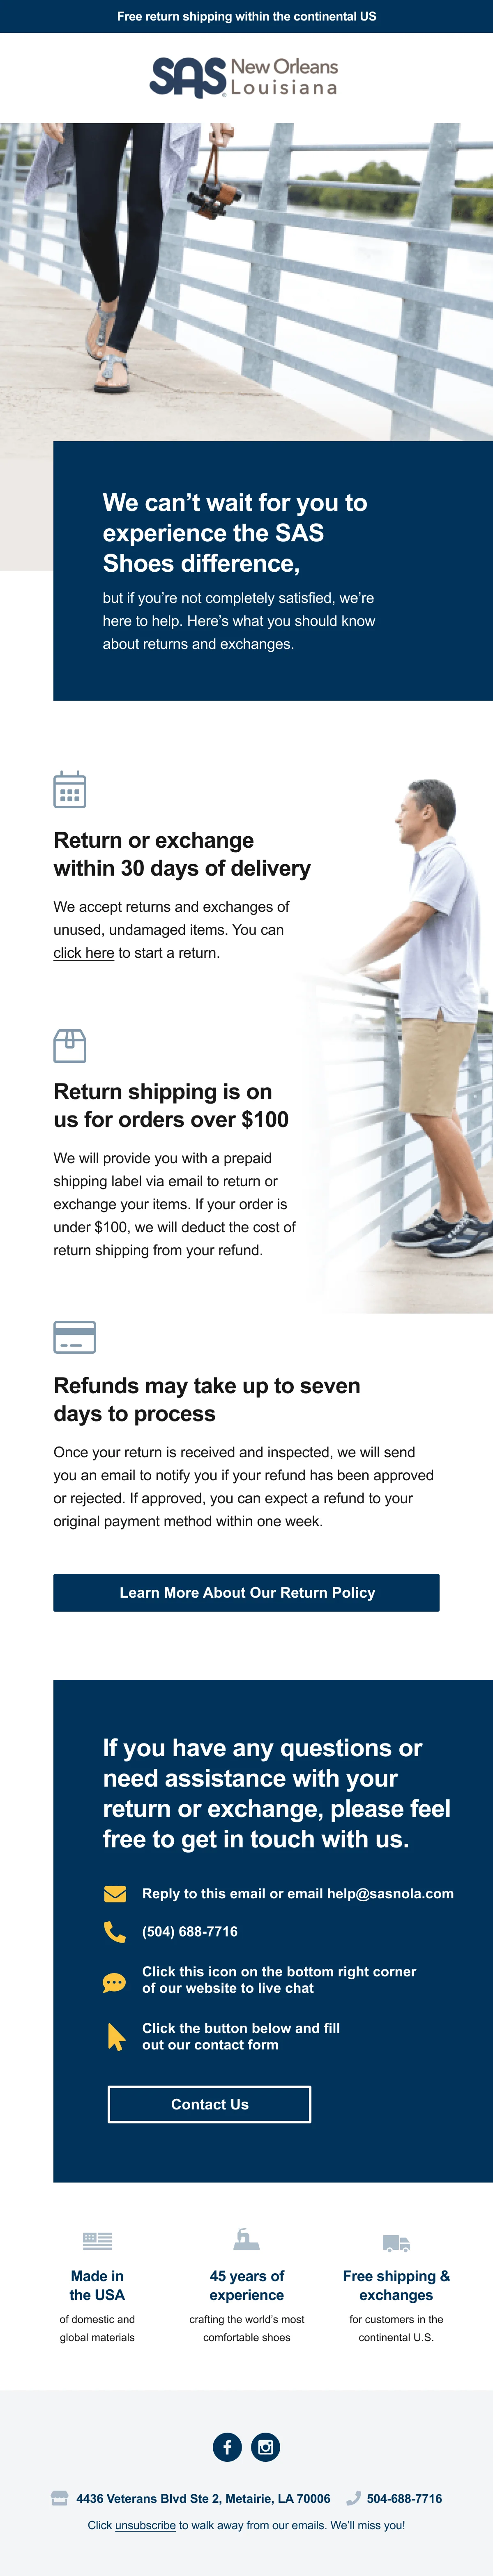
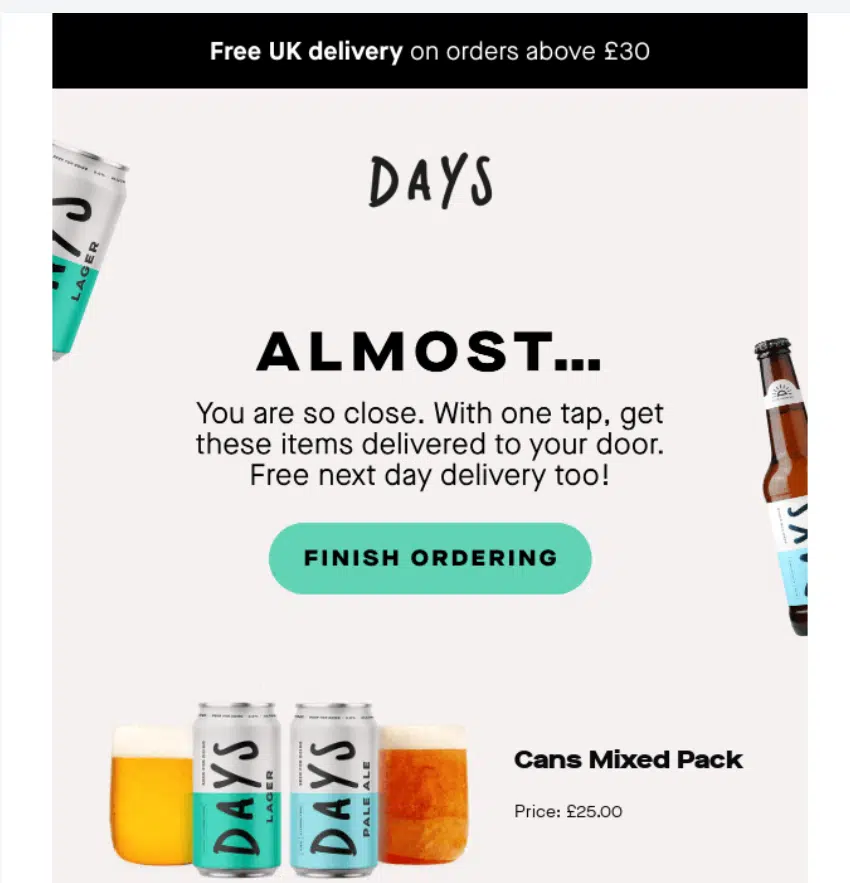
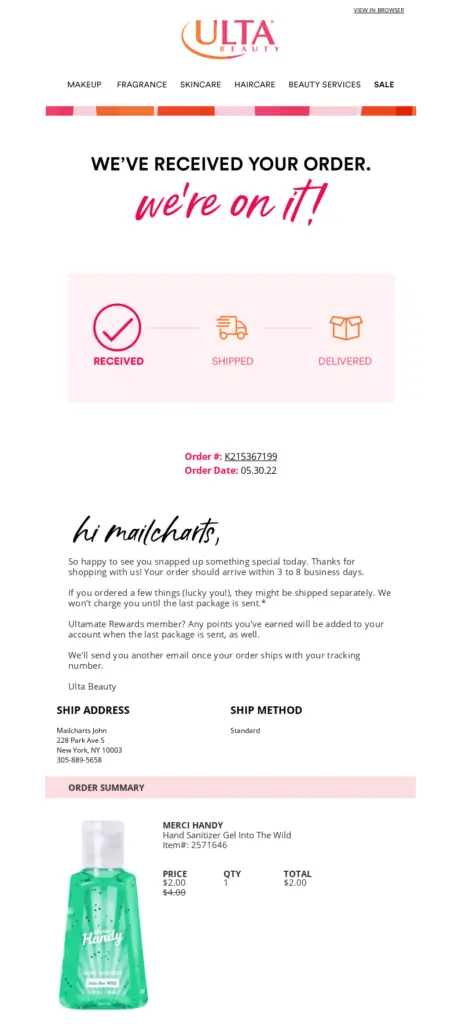
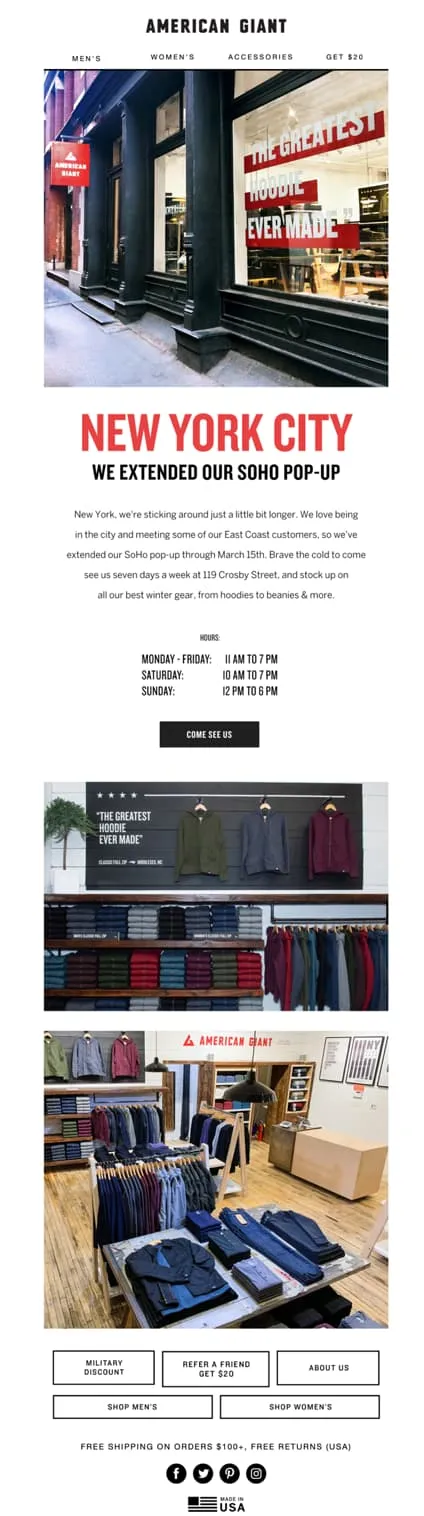
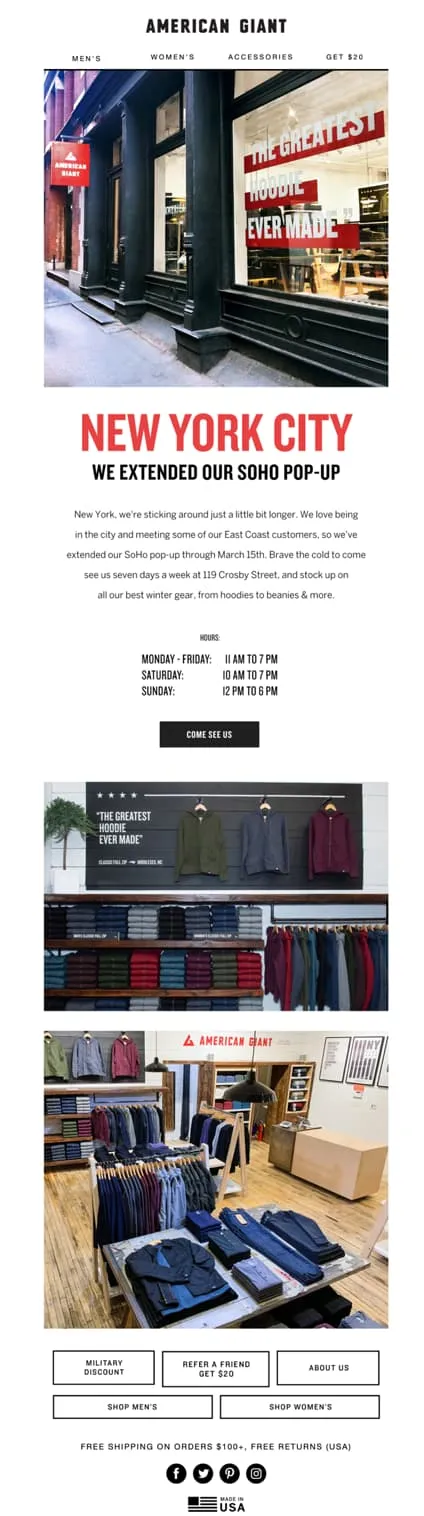

In [3]:


display.display(display.HTML(
    get_emails_from_query("back in stock emails with high urgency", index_name="email-type")
))